In [1]:
import os
os.getcwd()
os.chdir('L:\Selva\Project_files')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [15]:
# Read files
df1=pd.read_csv("ESBL-Kp_yearly_unique.csv")
df2= pd.read_csv("ESBL-Kp_quarterly_unique.csv")
df3= pd.read_csv("CG_count_for_graph.csv")

In [4]:
#Making dataframes for Figure 2
labels = ['2016', '2017', '2018', '2019', '2020','2021','2022']
non_ESBL_Kp = [66,
82,
71,
55,
39,
70,
79]
ESBL_Kp = [16,
24,
25,
23,
20,
19,
27]
ESBL_kp_rate = [19.51219512,
22.64150943,
26.04166667,
29.48717949,
33.89830508,
21.34831461,
26.6666
]

non_ESBL_Kp_rates = [80.48780488,
77.35849057,
73.95833333,
70.51282051,
66.10169492,
78.65168539,
74.52830189                     
]

df = pd.DataFrame(list(zip(labels,ESBL_Kp,non_ESBL_Kp)),
               columns =['Year', 'ESBL-Kp','non-ESBL_Kp'])

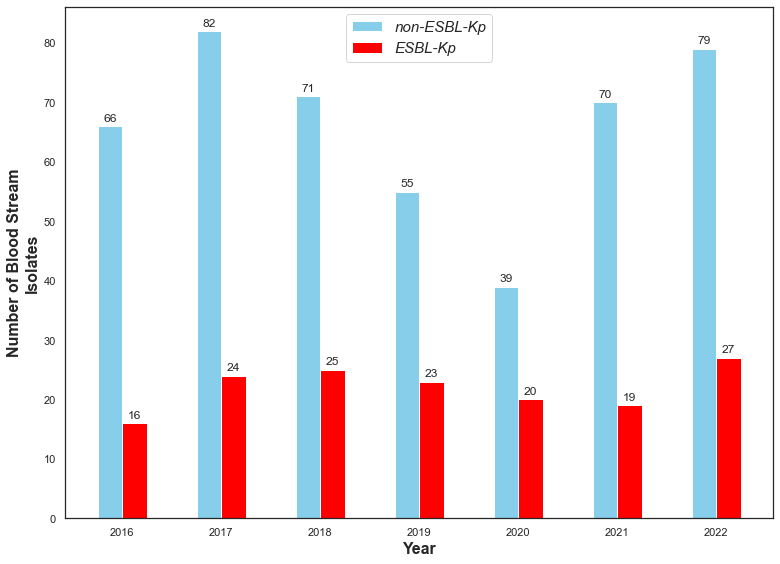

In [6]:
#Figure 2. Numbers and proportions of index Kp-BSIs from 2016-2022

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager

sns.set(rc={"figure.figsize":(11, 8)})
sns.set_style("white")
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize =(11, 8))
rects1 = ax.bar(x - width/2, non_ESBL_Kp, width, label='non-ESBL-Kp',color='skyblue')
rects2 = ax.bar(x + width/2, ESBL_Kp, width, label='ESBL-Kp',color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Blood Stream\nIsolates', fontweight ='bold', fontsize = 16)
ax.set_xlabel('Year', fontweight ='bold', fontsize = 16)
ax.set_xticks(x, labels)

font = font_manager.FontProperties(style='italic', size=15)
ax.legend(loc="upper center",prop=font)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()

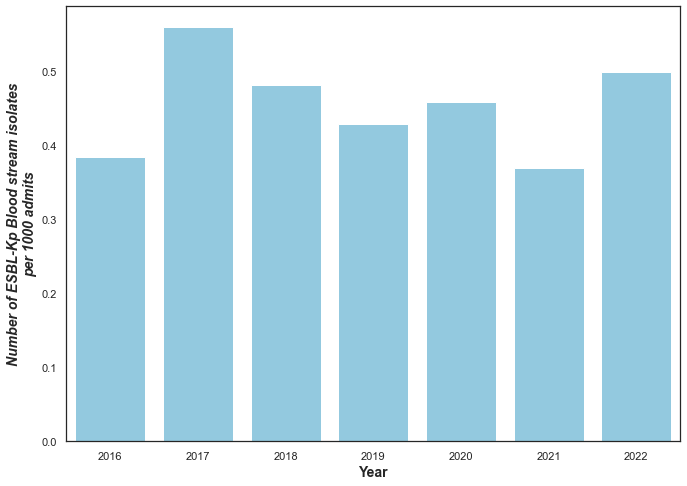

In [7]:
#Figure 3. Number of index ESBL-Kp BSIs normalized by number of hospital admissions

g6 = sns.barplot(data=df1,x='Year',y='ESBL-Kp', color = "skyblue")
g6.set_xlabel('Year',fontweight='bold',fontsize=14.0)
g6.set_ylabel('Number of ESBL-Kp Blood stream isolates\nper 1000 admits',fontweight='bold',fontsize=14.0,style="italic")
plt.savefig('ESBL_Kp_by_year_unique.png', bbox_inches='tight',dpi=600)

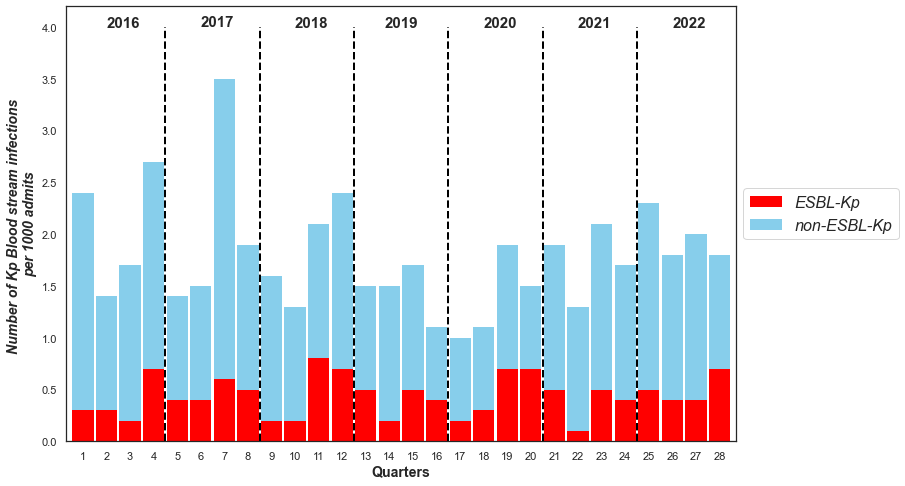

In [8]:
#Figure 4. Number of ESBL-Kp and non-ESBL-Kp BSIs stratified by 4 quarters of the year from 2016-2022

colors = sns.color_palette("RdBu", 2)
sns.set(rc={"figure.figsize":(12, 8)})#width #height
sns.set_style("white")

y_offset = -15
g2=df2.set_index('Quarters').plot(kind='bar', stacked=True, color=['red','skyblue'],edgecolor="none", width = 0.9)

g2.set_xlabel('Quarters',fontweight='bold',fontsize=14.0)
g2.set_ylabel('Number of Kp Blood stream infections \nper 1000 admits',fontweight='bold',fontsize=14.0, fontstyle="italic")
g2.set_xticklabels(g2.get_xticklabels(), rotation=-360)

g2.vlines(x = [7.5,0,3.5],
          ymin = 0, 
          ymax = [4.0, 0, 4.0], colors="black", linestyle="dashed", linewidth=2) 
g2.vlines(x = [7.5,0,11.5],
          ymin = 0, 
          ymax = [0, 0, 4.0], colors="black", linestyle="dashed", linewidth=2) 
g2.vlines(x = [7.5,0,15.5],
          ymin = 0, 
          ymax = [0, 0, 4.0], colors="black", linestyle="dashed",linewidth=2) 
g2.vlines(x = [7.5,0,19.5],
          ymin = 0, # Starting point for all lines
          ymax = [0, 0, 4.0], colors="black", linestyle="dashed",linewidth=2) 
g2.vlines(x = [7.5,0,23.5],
          ymin = 0, # Starting point for all lines
          ymax = [0, 0, 4.0], colors="black", linestyle="dashed",linewidth=2) 
font = font_manager.FontProperties(style='italic', size=16)
g2.legend(bbox_to_anchor=(0.999, 0.6),prop=font)
plt.text(1, 4, '2016', fontsize=15,fontweight="bold")
plt.text(5, 4.01, '2017', fontsize=15,fontweight="bold")
plt.text(9, 4, '2018', fontsize=15,fontweight="bold")
plt.text(12.8, 4, '2019', fontsize=15,fontweight="bold")
plt.text(17, 4, '2020', fontsize=15,fontweight="bold")
plt.text(21, 4, '2021', fontsize=15,fontweight="bold")
plt.text(25, 4, '2022', fontsize=15,fontweight="bold")

plt.savefig('ESBL_Kp_by_quarter_unique.png', bbox_inches='tight',dpi=600)

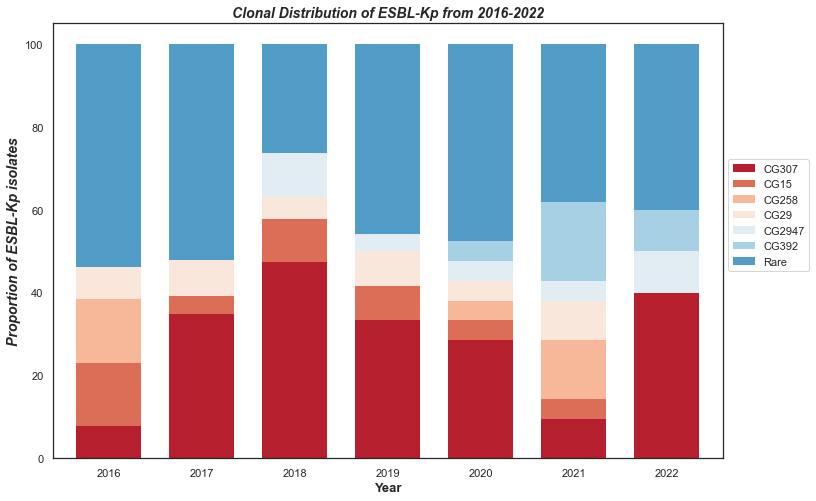

In [16]:
#Figure 5. Clonal group distribution of index ESBL-Kp BSIs from 2016 -2022
sns.set(rc={"figure.figsize":(12, 8)})
sns.set_style("white")
colors = sns.color_palette("RdBu", 8)

df3['CG307'] = [i / j * 100 for i,j in zip(df3['CG307'], df3['Total'])]
df3['CG15'] = [i / j * 100 for i,j in zip(df3['CG15'], df3['Total'])]
df3['CG258'] = [i / j * 100 for i,j in zip(df3['CG258'], df3['Total'])]
df3['CG29'] = [i / j * 100 for i,j in zip(df3['CG29'], df3['Total'])]
df3['CG2947'] = [i / j * 100 for i,j in zip(df3['CG2947'], df3['Total'])]
df3['CG392'] = [i / j * 100 for i,j in zip(df3['CG392'], df3['Total'])]
df3['Rare'] = [i / j * 100 for i,j in zip(df3['Rare'], df3['Total'])]
df3=df3.drop(columns=['Total'])

g3=df3.set_index('Year').plot(kind='bar', stacked=True, color=colors,edgecolor="none", width=0.7)
g3.set_ylabel('Proportion of ESBL-Kp isolates',fontweight='bold',style="italic",fontsize=14.0)
g3.set_xticklabels(g3.get_xticklabels(), rotation=-360)
g3.set_xlabel('Year',fontweight='bold',fontsize=13.0)
g3.legend(bbox_to_anchor=(1.0, 0.7))
g3.set_title("Clonal Distribution of ESBL-Kp from 2016-2022",fontweight='bold',style="italic",fontsize=14.0 )
plt.savefig('CG_distribution.png', bbox_inches='tight',dpi=600)

,Year,CG307,CG15,CG258,CG29,CG2947,CG392,Rare
0,2016,7.692308,15.384615,15.384615,7.692308,0.000000,0.000000,53.846154
1,2017,34.782609,4.347826,0.000000,8.695652,0.000000,0.000000,52.173913
2,2018,47.368421,10.526316,0.000000,5.263158,10.526316,0.000000,26.315789
3,2019,33.333333,8.333333,0.000000,8.333333,4.166667,0.000000,45.833333
4,2020,28.571429,4.761905,4.761905,4.761905,4.761905,4.761905,47.619048
5,2021,9.523810,4.761905,14.285714,9.523810,4.761905,19.047619,38.095238
6,2022,40.000000,0.000000,0.000000,0.000000,10.000000,10.000000,40.000000
